In [2]:
from scipy.stats import binom, uniform
import matplotlib.pyplot as plt
import numpy as np

# Биномиальное распределение 

Probability mass function values: [0.36 0.48 0.16]


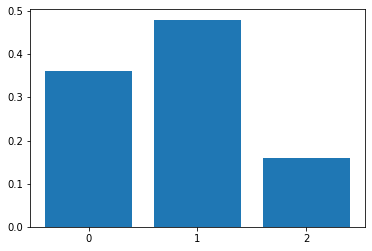

In [3]:
rv = binom(2, 0.4)
x = np.arange(3)
binom_pmf = rv.pmf(x)
print ("Probability mass function values: {}".format(binom_pmf))
plt.bar(x, binom_pmf, width=0.8, tick_label=x)
plt.show()

# Равномерное распределение

Probability mass function values: [0.33333333 0.33333333 0.33333333]


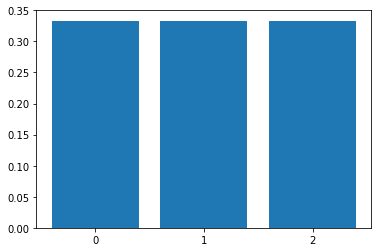

In [4]:
uniform_pmf = 1 / len(x) * np.ones_like(x)
print ("Probability mass function values: {}".format(uniform_pmf))
plt.bar(x, uniform_pmf, width=0.8, tick_label=x)
plt.show()

# KL-дивергенция cвоими руками

In [5]:
# https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

$D_\text{KL}(P \parallel Q)$

In [6]:
print ("%.7f" % kl_divergence(binom_pmf, uniform_pmf))

0.0852996


$D_\text{KL}(Q \parallel P)$

In [7]:
print ("%.6f" % kl_divergence(uniform_pmf, binom_pmf))

0.097455


# KL-дивергенция из scipy

In [8]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kl_div.html
from scipy.special import kl_div

In [9]:
print ("%.7f" % np.sum(kl_div(binom_pmf, uniform_pmf)))

0.0852996


In [10]:
print ("%.6f" % np.sum(kl_div(uniform_pmf, binom_pmf)))

0.097455


# JS-дивергенция своими руками

In [11]:
def js_divergence(p, q):
    m = (p + q) / 2
    return (kl_divergence(p, m) + kl_divergence(q, m)) / 2

In [12]:
print ("%.7f" % js_divergence(binom_pmf, uniform_pmf))

0.0224599


In [13]:
print ("%.7f" % js_divergence(uniform_pmf, binom_pmf))

0.0224599


# JS-дивергенция

In [14]:
# https://scipy.github.io/devdocs/generated/scipy.spatial.distance.jensenshannon.html
from scipy.spatial.distance import jensenshannon

Compute the Jensen-Shannon distance (metric) between two 1-D probability arrays. This is the square root  of the Jensen-Shannon divergence. The Jensen-Shannon distance between two probability vectors `p` and `q` is defined as,  $\sqrt{\frac{D(p \parallel m) + D(q \parallel m)}{2}}$, where `m` is the pointwise mean of `p` and `q` and :math:`D` is the Kullback-Leibler divergence.


In [15]:
print ("%.7f" % jensenshannon(binom_pmf, uniform_pmf) ** 2)

0.0224599


In [16]:
print ("%.7f" % jensenshannon(uniform_pmf, binom_pmf) ** 2)

0.0224599


# Эксперименты с дельта-функциями

In [17]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.unit_impulse.html
from scipy.signal import unit_impulse

In [18]:
omega = 5
n_observations = 10

In [19]:
p = unit_impulse(n_observations)
q = unit_impulse(n_observations, idx=omega)
print ('p: {}'.format(p))
print ('q: {}'.format(q))

p: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
q: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


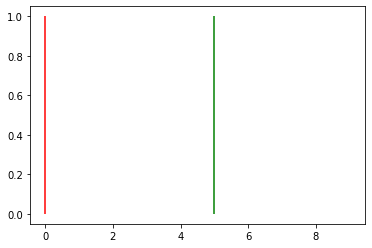

In [20]:
plt.vlines(np.arange(len(p)), 0, p, colors='r')
plt.vlines(np.arange(len(p)), 0, q, colors='g')
plt.show()

$D_\text{KL}(P \parallel Q)$

In [21]:
np.sum(kl_div(p, q))

inf

$JSD (P \parallel Q)$

In [22]:
jensenshannon(p, q) ** 2 # это ln(2)

0.6931471805599452

In [23]:
np.allclose(np.log(2), jensenshannon(p, q) ** 2)

True

# Будем постепенно уменьшать координату в распредлении q

KL div: inf,
JS div: 0.6931471805599452


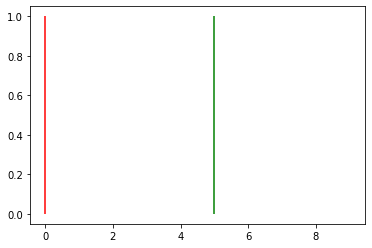

KL div: inf,
JS div: 0.6931471805599452


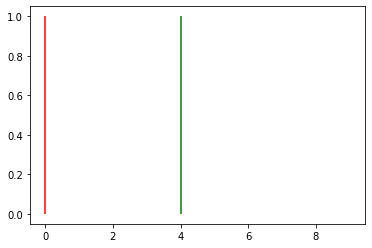

KL div: inf,
JS div: 0.6931471805599452


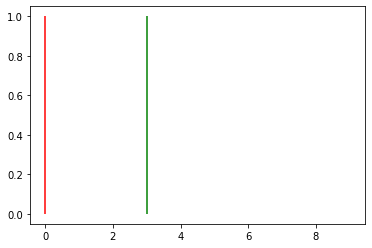

KL div: inf,
JS div: 0.6931471805599452


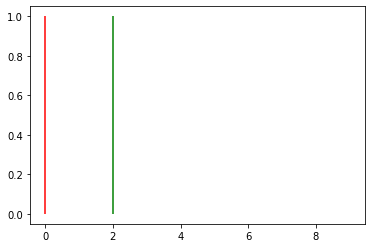

KL div: inf,
JS div: 0.6931471805599452


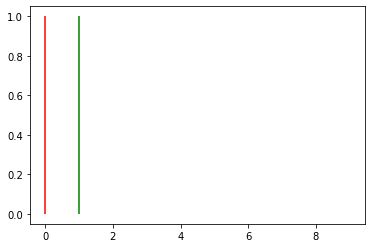

KL div: 0.0,
JS div: 0.0


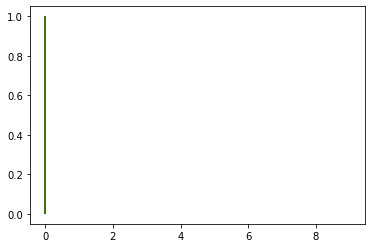

In [24]:
for omega in range(5, -1, -1):
    print ('================================')
    p = unit_impulse(n_observations)
    q = unit_impulse(n_observations, idx=omega)    
    kl = np.sum(kl_div(p, q))
    js = jensenshannon(p, q) ** 2
    print ("KL div: {},\nJS div: {}".format(kl, js))
    plt.vlines(np.arange(len(p)), 0, p, colors='r')
    plt.vlines(np.arange(len(p)), 0, q, colors='g')
    plt.show()

# Earth Mover's Distance (Wasserstein Distance)

In [25]:
from scipy.stats import wasserstein_distance

KL div: inf,
JS div: 0.6931471805599452,
EMD: 5.0


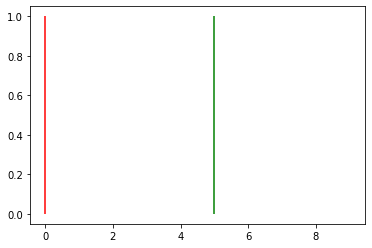

KL div: inf,
JS div: 0.6931471805599452,
EMD: 4.0


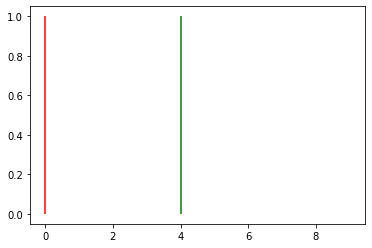

KL div: inf,
JS div: 0.6931471805599452,
EMD: 3.0


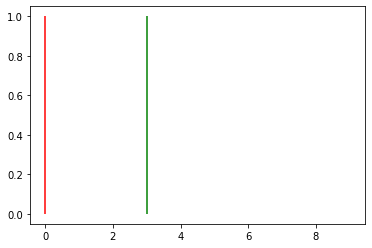

KL div: inf,
JS div: 0.6931471805599452,
EMD: 2.0


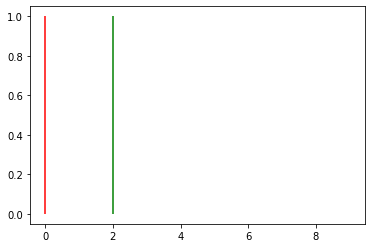

KL div: inf,
JS div: 0.6931471805599452,
EMD: 1.0


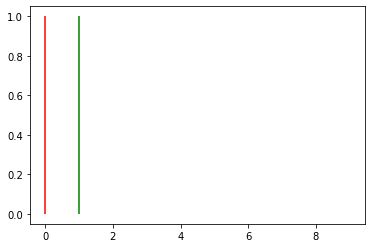

KL div: 0.0,
JS div: 0.0,
EMD: 0.0


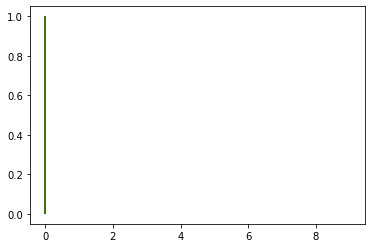

In [26]:
for omega in range(5, -1, -1):
    print ('================================')
    p = unit_impulse(n_observations)
    q = unit_impulse(n_observations, idx=omega)    
    kl = np.sum(kl_div(p, q))
    js = jensenshannon(p, q) ** 2
    emd = wasserstein_distance([np.argmax(p)], [np.argmax(q)]) # emd при
    print ("KL div: {},\nJS div: {},\nEMD: {}".format(kl, js, emd))
    plt.vlines(np.arange(len(p)), 0, p, colors='r')
    plt.vlines(np.arange(len(p)), 0, q, colors='g')
    plt.show()